# import MNIST 


In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

# Preprocesing Data

In [2]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


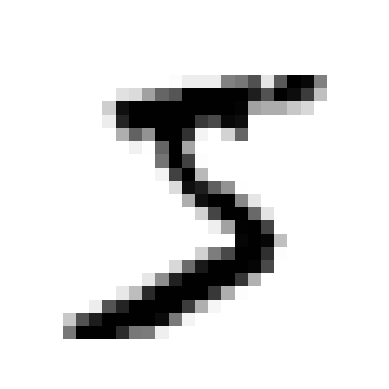

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

x_array = X.to_numpy()
some_digit = x_array[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [4]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

# Training a classifier

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [7]:
y_knn_pred = knn_clf.predict(X_test)
y_knn_pred

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

# Data validation

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

# Shift Image function

In [9]:
from scipy.ndimage import shift

def shift_digit(image,dx, dy):
    image = image.reshape(28, 28)
    shift_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shift_image.reshape([-1])

In [10]:
# import numpy as np

# X_train = [np.array(image) if isinstance(image, str) else image for image in X_train]

(784,)


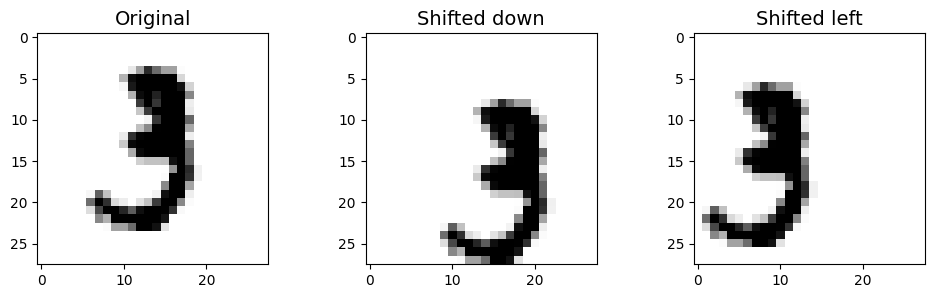

In [11]:
X_train = X_train.to_numpy()
print(X_train[10].shape)
main_image = X_train[10]
shifted_image_down = shift_digit(main_image, 3, 4)
shifted_image_left = shift_digit(main_image, -5 ,2)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(main_image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [12]:
for image in X_train:
    print(type(image))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

In [13]:
import numpy as np
for i, image in enumerate(X_train):
    print(f"Image {i} shape: {np.array(image.shape)}")


Image 0 shape: [784]
Image 1 shape: [784]
Image 2 shape: [784]
Image 3 shape: [784]
Image 4 shape: [784]
Image 5 shape: [784]
Image 6 shape: [784]
Image 7 shape: [784]
Image 8 shape: [784]
Image 9 shape: [784]
Image 10 shape: [784]
Image 11 shape: [784]
Image 12 shape: [784]
Image 13 shape: [784]
Image 14 shape: [784]
Image 15 shape: [784]
Image 16 shape: [784]
Image 17 shape: [784]
Image 18 shape: [784]
Image 19 shape: [784]
Image 20 shape: [784]
Image 21 shape: [784]
Image 22 shape: [784]
Image 23 shape: [784]
Image 24 shape: [784]
Image 25 shape: [784]
Image 26 shape: [784]
Image 27 shape: [784]
Image 28 shape: [784]
Image 29 shape: [784]
Image 30 shape: [784]
Image 31 shape: [784]
Image 32 shape: [784]
Image 33 shape: [784]
Image 34 shape: [784]
Image 35 shape: [784]
Image 36 shape: [784]
Image 37 shape: [784]
Image 38 shape: [784]
Image 39 shape: [784]
Image 40 shape: [784]
Image 41 shape: [784]
Image 42 shape: [784]
Image 43 shape: [784]
Image 44 shape: [784]
Image 45 shape: [784

In [14]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_digit(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [15]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [16]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier()

In [17]:
KNeighborsClassifier(n_neighbors=4, weights='distance')

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [18]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

g:\Programming exercise\python exercise\machine learning ex\ml_env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.9754